In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
mouse_drug_data = "mouse_drug_data.csv"
clinical_trial_data = "clinicaltrial_data.csv"

In [4]:
mdd_df = pd.read_csv(mouse_drug_data)
mdd_df.head()

ctd_df = pd.read_csv(clinical_trial_data)
ctd_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
combine_df = pd.merge(mdd_df, ctd_df, how="left", on=["Mouse ID"])
combine_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [6]:
combine_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [7]:
Average=combine_df["Tumor Volume (mm3)"].mean()
Average

50.46811996371502

In [9]:
tumor_volume_df=pd.DataFrame({"Average_Tumor_Volume": [50.46811996371502]})
tumor_volume_df


,Average_Tumor_Volume
0,50.46812


In [10]:
New_df = pd.DataFrame(combine_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()).reset_index()
New_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


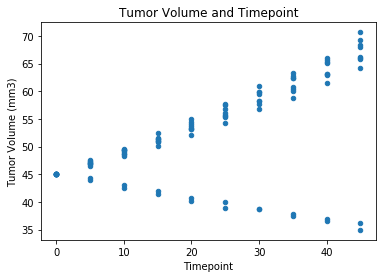

In [11]:
Ax1=New_df.plot.scatter(x='Timepoint',y='Tumor Volume (mm3)',
              title="Tumor and Drug")
plt.title("Tumor Volume and Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [12]:
New2_df = pd.DataFrame(combine_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()).reset_index()
New2_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [13]:
tumor_vols_pivot_sem = New_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vols_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


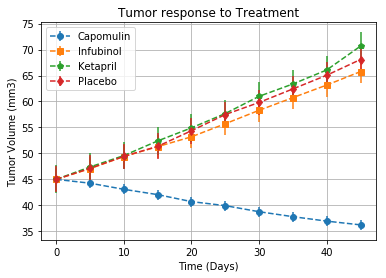

In [32]:
Timepoint=tumor_vols_pivot_sem.index
plt.errorbar(Timepoint, tumor_vols_pivot_sem['Capomulin'],yerr=tumor_vols_pivot_sem['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, tumor_vols_pivot_sem['Infubinol'],yerr=tumor_vols_pivot_sem['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, tumor_vols_pivot_sem['Ketapril'],yerr=tumor_vols_pivot_sem['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, tumor_vols_pivot_sem['Placebo'],yerr=tumor_vols_pivot_sem['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")

plt.title("Tumor response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc='upper left')
plt.savefig("results.jpg")
plt.grid()
plt.show()

            

In [17]:
Metastatic_df=pd.DataFrame(combine_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()).reset_index()
Metastatic_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [18]:
Metastatic_sem=pd.DataFrame(combine_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()).reset_index()
Metastatic_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [19]:
Metastatic_vols_pivot_sem = Metastatic_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
Metastatic_vols_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


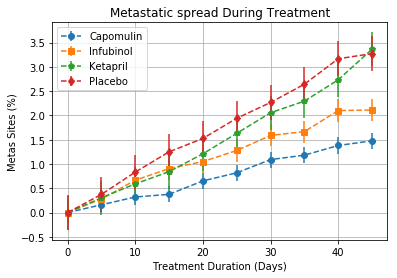

In [31]:
Timepoint=Metastatic_vols_pivot_sem.index
plt.errorbar(Timepoint, Metastatic_vols_pivot_sem['Capomulin'],yerr=Metastatic_vols_pivot_sem['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(Timepoint, Metastatic_vols_pivot_sem['Infubinol'],yerr=Metastatic_vols_pivot_sem['Infubinol'].sem(), marker ='s', linestyle='--', label="Infubinol")
plt.errorbar(Timepoint, Metastatic_vols_pivot_sem['Ketapril'],yerr=Metastatic_vols_pivot_sem['Ketapril'].sem(), marker ='p', linestyle='--', label="Ketapril")
plt.errorbar(Timepoint, Metastatic_vols_pivot_sem['Placebo'],yerr=Metastatic_vols_pivot_sem['Placebo'].sem(), marker ='d', linestyle='--', label="Placebo")
plt.title("Metastatic spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metas Sites (%)")
plt.legend(loc='upper left')
plt.savefig("results.jpg")
plt.grid()
plt.show()


In [21]:
mouse_response =  combine_df.groupby(['Drug','Timepoint']).count()[['Mouse ID']].reset_index()
mouse_response.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
Survival_pivot = mouse_response.pivot(index="Timepoint", columns="Drug")["Mouse ID"]
Survival_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


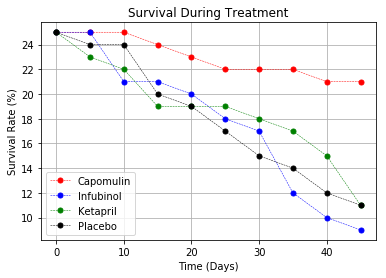

In [30]:
plt.errorbar(Survival_pivot.index, Survival_pivot['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Survival_pivot.index, Survival_pivot['Infubinol'], 
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Survival_pivot.index, Survival_pivot['Ketapril'], 
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(Survival_pivot.index, Survival_pivot['Placebo'], 
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc='lower left')
plt.savefig("results.jpg")
plt.grid()
plt.show()

In [24]:
Percent_Change = (((tumor_vols_pivot_sem.iloc[-1]-tumor_vols_pivot_sem.iloc[0])/tumor_vols_pivot_sem.iloc[0])*100)
Percent_Change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [28]:
Percent_change_df=pd.DataFrame({
    "Drug":["Capomulin", "Infubinol","Ketapril","Placebo"],
  "% Change":[-19.475,46.123,57.02,51.29]
})
Percent_change_df

,Drug,% Change
0,Capomulin,-19.475
1,Infubinol,46.123
2,Ketapril,57.020
3,Placebo,51.290


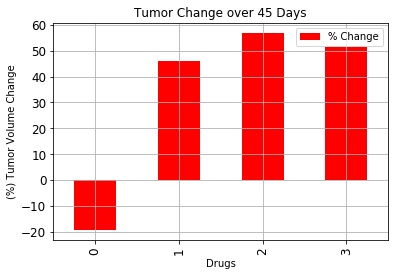

In [33]:
x=Percent_change_df.index
y=Percent_change_df['% Change']
ax = Percent_change_df[['Drug','% Change']].plot(kind='bar',color='red',title ="Tumor Change over 45 Days", legend=True, fontsize=12)
plt.grid(True)
plt.xlabel("Drugs")
plt.ylabel("(%) Tumor Volume Change")
plt.savefig("results.jpg")
plt.show()
